## ACTIVIDAD CASA EN GRUPO

In [2]:
#Importación de Librerías
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
#Carga del Dataset
datos = pd.read_csv('Housing_Modified.csv')

datos.info()

datos.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    object 
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 51.3+ KB


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


EJEMPLO 20: 

Construir el modelo de regresión lineal multivariado con statsmodels y analizar sus
parámetros estadísticos (se explican a continuación).

In [6]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
df = pd.read_csv('Housing_Modified.csv') # Cargar datos
# Convertir campos binarios a campos booleanos numéricos
lb = preprocessing.LabelBinarizer()
df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)
# Crea variables dummy para stories
df_stories = pd.get_dummies(df['stories'], prefix='stories', drop_first=True)
df = pd.concat([df, df_stories], axis=1) # Unirlas al dataset
del df['stories']
# Codificar las dummies como numéricas 1 = True, 0=False para hacer cálculos
df['stories_one'] = df['stories_one'].map({True:1, False:0})
df['stories_two'] = df['stories_two'].map({True:1, False:0})
df['stories_three'] = df['stories_three'].map({True:1, False:0})
# Definir el problema: target ~ predictoras
predictoras = ['lotsize', 'bathrms','driveway', 'recroom', 'fullbase', 'gashw', 'airco',
'garagepl', 'prefarea', 'stories_one','stories_two','stories_three']
X = df[predictoras]
y = df['price']
# Dividir datos en 80/20 para train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=1)
# crea y entrena un modelo de mínimos cuadrados ordinario e imprimir resumen
import statsmodels.api as sm
x = X_train
y = y_train
x = sm.add_constant(x)
ols = sm.OLS(y,x).fit()
print(ols.summary()) # Resumen estadístico del modelo
# Hacer predicciones sobre el dataset test
y_train_pred = ols.predict(x)
X_test = sm.add_constant(X_test)
y_test_pred = ols.predict(X_test)
print( "Train MAE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print( "Train RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print( "Test MAE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print( "Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     75.77
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           2.38e-97
Time:                        18:54:22   Log-Likelihood:                -4810.4
No. Observations:                 436   AIC:                             9647.
Df Residuals:                     423   BIC:                             9700.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.818e+04   4719.573      5.971

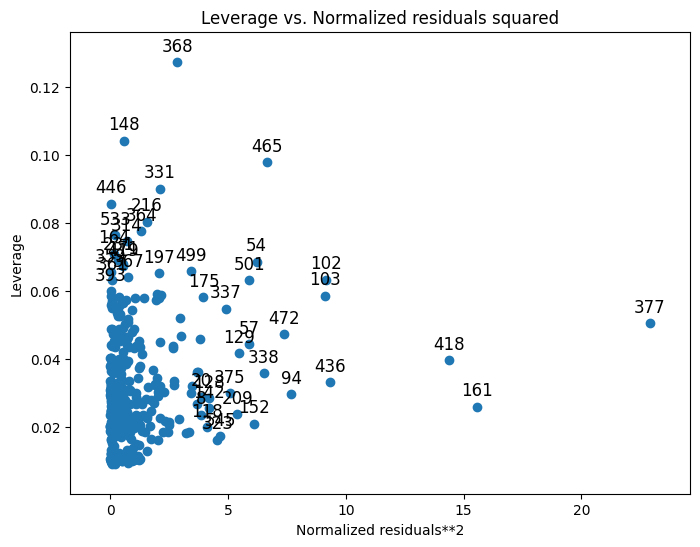

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(ols, ax = ax) #cambiamos a ols